# An√°lisis de Sentimientos en Tweets Pol√≠ticos
## NLP para Ciencias Sociales - Clase Pr√°ctica

### Objetivos de la clase

En esta sesi√≥n nos enfocaremos exclusivamente en **an√°lisis de sentimientos** usando:
- **pysentimiento** (modelo especializado en espa√±ol para redes sociales)
- **Transformers de Hugging Face** (comparaci√≥n con modelos estado del arte)
- **An√°lisis temporal** de evoluci√≥n emocional
- **Comparaci√≥n entre pol√≠ticos** en dimensiones de sentimiento

**Pol√≠ticos analizados:**
- Gustavo Petro
- Iv√°n Duque  
- √Ålvaro Uribe
- Gustavo Bol√≠var

---

## 1. Configuraci√≥n e instalaci√≥n

In [ ]:
# Instalaci√≥n de librer√≠as necesarias
!pip install pysentimiento transformers torch plotly -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 71.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 56.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Librer√≠as para an√°lisis de sentimientos
from pysentimiento import create_analyzer
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Otras librer√≠as
from collections import Counter, defaultdict
import re
from datetime import datetime
import spacy

# Configuraci√≥n de visualizaci√≥n
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
sns.set_style("whitegrid")

print("Configuraci√≥n completada")
print("Librer√≠as cargadas: pysentimiento, transformers, plotly")

Configuraci√≥n completada
Librer√≠as cargadas: pysentimiento, transformers, plotly


## 2. Carga de y preprocesamiento de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Clases/NLP para ciencias sociales/99. Datos/tweets_muestra_estratificada.csv'
df = pd.read_csv(file_path)
print(df.head())

                         id       politico                       fecha_raw  \
0  677f1f14782ccacddc4e6e35  Gustavo Petro  Tue Mar 24 19:44:38 +0000 2020   
1  677f1f13782ccacddc4e6a20  Gustavo Petro  Thu Mar 26 13:29:14 +0000 2020   
2  677f1f15782ccacddc4e72c7  Gustavo Petro  Wed Mar 11 00:17:32 +0000 2020   
3  677f1f14782ccacddc4e6e26  Gustavo Petro  Tue Mar 24 21:19:29 +0000 2020   
4  677f1f13782ccacddc4e672d  Gustavo Petro  Fri Mar 27 12:25:47 +0000 2020   

                                               texto  \
0  Existe en nuestra sociedad burbujas informativ...   
1  La evaluaci√≥n del presidente de la asociaci√≥n ...   
2  Solo dejando de emitir CO2 en todo el mundo se...   
3  Solo he hablado una vez con el presidente para...   
4  El confinamiento se prolongar√° al menos dos me...   

                       fecha     a√±o  mes  a√±o_mes  
0  2020-03-24 19:44:38+00:00  2020.0  3.0  2020-03  
1  2020-03-26 13:29:14+00:00  2020.0  3.0  2020-03  
2  2020-03-11 00:17:32+00:00  

In [ ]:
print(f"Dataset cargado: {len(df):,} tweets")
print(f"Per√≠odo: {df['fecha'].min()} - {df['fecha'].max()}")
print(f"Pol√≠ticos: {', '.join(df['politico'].unique())}")

Dataset cargado: 4,005 tweets
Per√≠odo: 2019-01-01 01:30:52+00:00 - 2024-08-27 14:04:20+00:00
Pol√≠ticos: Gustavo Petro, √Ålvaro Uribe, Iv√°n Duque, Gustavo Bol√≠var


In [ ]:
# Preparar datos temporales si no existen o si la columna 'fecha' no es datetime
if 'fecha' not in df.columns:
    print("La columna 'fecha' no existe. Creando columna temporal...")
    # Create a placeholder if 'fecha' doesn't exist
    df['fecha'] = pd.date_range('2019-01-01', periods=len(df), freq='D')
else:
    # Ensure 'fecha' is datetime, coercing errors to NaT
    print("Convirtiendo la columna 'fecha' a datetime...")
    df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

# Drop rows where fecha is NaT after coercion, as they cannot be used for temporal analysis
df.dropna(subset=['fecha'], inplace=True)

# Now extract temporal components from the datetime column
df['a√±o'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['trimestre'] = df['fecha'].dt.quarter
df['a√±o_trimestre'] = df['a√±o'].astype(str) + '-Q' + df['trimestre'].astype(str)

print("Columnas temporales creadas o actualizadas.")

Convirtiendo la columna 'fecha' a datetime...
Columnas temporales creadas o actualizadas.


In [ ]:
print(df.head())

                         id       politico                       fecha_raw  \
0  677f1f14782ccacddc4e6e35  Gustavo Petro  Tue Mar 24 19:44:38 +0000 2020   
1  677f1f13782ccacddc4e6a20  Gustavo Petro  Thu Mar 26 13:29:14 +0000 2020   
2  677f1f15782ccacddc4e72c7  Gustavo Petro  Wed Mar 11 00:17:32 +0000 2020   
3  677f1f14782ccacddc4e6e26  Gustavo Petro  Tue Mar 24 21:19:29 +0000 2020   
4  677f1f13782ccacddc4e672d  Gustavo Petro  Fri Mar 27 12:25:47 +0000 2020   

                                               texto  \
0  Existe en nuestra sociedad burbujas informativ...   
1  La evaluaci√≥n del presidente de la asociaci√≥n ...   
2  Solo dejando de emitir CO2 en todo el mundo se...   
3  Solo he hablado una vez con el presidente para...   
4  El confinamiento se prolongar√° al menos dos me...   

                      fecha   a√±o  mes  a√±o_mes  trimestre a√±o_trimestre  
0 2020-03-24 19:44:38+00:00  2020    3  2020-03          1       2020-Q1  
1 2020-03-26 13:29:14+00:00  2020    3

In [ ]:
# Funci√≥n de limpieza espec√≠fica para an√°lisis de sentimientos
def clean_text_for_sentiment(text):
    """
    Limpieza m√≠nima para preservar contexto emocional en tweets
    """
    if pd.isna(text):
        return ""

    text = str(text)
    # Mantener emojis y signos de exclamaci√≥n/interrogaci√≥n para sentimientos
    # Solo quitar URLs y limpiar espacios
    text = re.sub(r'http\S+|www\.\S+|bit\.ly\S+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Aplicar limpieza
df['texto_sentiment'] = df['texto'].apply(clean_text_for_sentiment)
df = df[df['texto_sentiment'].str.len() > 10].reset_index(drop=True)

print(f"Dataset preparado: {len(df):,} tweets para an√°lisis de sentimientos")

# Mostrar distribuci√≥n por pol√≠tico
print(f"\nDistribuci√≥n por pol√≠tico:")
for politico, count in df['politico'].value_counts().items():
    pct = (count / len(df)) * 100
    print(f"  {politico}: {count:,} tweets ({pct:.1f}%)")

df.head(3)

Dataset preparado: 4,000 tweets para an√°lisis de sentimientos

Distribuci√≥n por pol√≠tico:
  Gustavo Petro: 1,351 tweets (33.8%)
  √Ålvaro Uribe: 927 tweets (23.2%)
  Gustavo Bol√≠var: 918 tweets (22.9%)
  Iv√°n Duque: 804 tweets (20.1%)


id       politico                       fecha_raw  \
0  677f1f14782ccacddc4e6e35  Gustavo Petro  Tue Mar 24 19:44:38 +0000 2020   
1  677f1f13782ccacddc4e6a20  Gustavo Petro  Thu Mar 26 13:29:14 +0000 2020   
2  677f1f15782ccacddc4e72c7  Gustavo Petro  Wed Mar 11 00:17:32 +0000 2020   

                                               texto  \
0  Existe en nuestra sociedad burbujas informativ...   
1  La evaluaci√≥n del presidente de la asociaci√≥n ...   
2  Solo dejando de emitir CO2 en todo el mundo se...   

                      fecha   a√±o  mes  a√±o_mes  trimestre a√±o_trimestre  \
0 2020-03-24 19:44:38+00:00  2020    3  2020-03          1       2020-Q1   
1 2020-03-26 13:29:14+00:00  2020    3  2020-03          1       2020-Q1   
2 2020-03-11 00:17:32+00:00  2020    3  2020-03          1       2020-Q1   

                                     texto_sentiment  
0  Existe en nuestra sociedad burbujas informativ...  
1  La evaluaci√≥n del presidente de la asociaci√≥n ...  
2  Solo dejando de emitir CO2 en todo el mundo se...

## 3. An√°lisis de sentimientos con pysentimiento

### ¬øPor qu√© pysentimiento para tweets en espa√±ol?

**pysentimiento** es una librer√≠a desarrollada espec√≠ficamente para an√°lisis de sentimientos en espa√±ol, entrenada con datos de redes sociales latinoamericanas. Sus ventajas:

- **Especializaci√≥n en espa√±ol**: Entrenado con millones de tweets en espa√±ol
- **Comprensi√≥n de jerga**: Maneja lenguaje informal y expresiones regionales
- **Contexto de redes sociales**: Optimizado para textos cortos como tweets
- **Interpretaci√≥n de emojis**: Incluye emojis como se√±ales emocionales

In [ ]:
# Inicializar analizador de pysentimiento
print("Inicializando analizador de pysentimiento...")
sentiment_analyzer = create_analyzer(task="sentiment", lang="es")

def analyze_sentiment_pysentimiento(text):
    """
    Analiza sentimiento usando pysentimiento
    Retorna: (etiqueta, probabilidad)
    """
    if not text or len(text.strip()) < 3:
        return 'NEU', 0.33

    try:
        result = sentiment_analyzer.predict(text)
        label = result.output
        # Obtener probabilidad de la clase predicha
        probability = max(result.probas.values())
        return label, probability
    except Exception as e:
        print(f"Error procesando texto: {e}")
        return 'NEU', 0.33

Inicializando analizador de pysentimiento...


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [ ]:
# Procesar sentimientos en lotes
print("Analizando sentimientos con pysentimiento...")
print("Esto puede tardar varios minutos dependiendo del tama√±o del dataset...")

sentiment_results = []
batch_size = 100

for i in range(0, len(df), batch_size):
    batch = df['texto_sentiment'].iloc[i:i+batch_size]
    batch_results = [analyze_sentiment_pysentimiento(text) for text in batch]
    sentiment_results.extend(batch_results)

    if (i // batch_size + 1) % 10 == 0:
        print(f"  Procesados: {i+batch_size:,}/{len(df):,} tweets ({(i+batch_size)/len(df)*100:.1f}%)")

Analizando sentimientos con pysentimiento...
Esto puede tardar varios minutos dependiendo del tama√±o del dataset...
  Procesados: 1,000/4,000 tweets (25.0%)
  Procesados: 2,000/4,000 tweets (50.0%)
  Procesados: 3,000/4,000 tweets (75.0%)
  Procesados: 4,000/4,000 tweets (100.0%)


In [ ]:
# Agregar resultados al dataframe
df['sentiment_label'] = [result[0] for result in sentiment_results]
df['sentiment_confidence'] = [result[1] for result in sentiment_results]

print("An√°lisis completado!")

# Mostrar distribuci√≥n general
sentiment_dist = df['sentiment_label'].value_counts()
print(f"\nDistribuci√≥n general de sentimientos:")
for sentiment, count in sentiment_dist.items():
    percentage = (count / len(df)) * 100
    print(f"  {sentiment}: {count:,} tweets ({percentage:.1f}%)")

An√°lisis completado!

Distribuci√≥n general de sentimientos:
  NEG: 1,748 tweets (43.7%)
  NEU: 1,347 tweets (33.7%)
  POS: 905 tweets (22.6%)


## 4. Visualizaci√≥n b√°sica de resultados

In [ ]:
def create_sentiment_overview_plots(df):
    """
    Crea visualizaciones generales de sentimientos
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Distribuci√≥n general
    sentiment_counts = df['sentiment_label'].value_counts()
    colors = {'POS': 'green', 'NEG': 'red', 'NEU': 'gray'}

    bars = axes[0, 0].bar(sentiment_counts.index, sentiment_counts.values,
                         color=[colors.get(x, 'blue') for x in sentiment_counts.index])
    axes[0, 0].set_title('Distribuci√≥n General de Sentimientos')
    axes[0, 0].set_ylabel('N√∫mero de Tweets')

    # A√±adir porcentajes
    for bar, count in zip(bars, sentiment_counts.values):
        percentage = (count / len(df)) * 100
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                       f'{percentage:.1f}%', ha='center', va='bottom')

    # 2. Sentimientos por pol√≠tico
    sentiment_by_politician = df.groupby(['politico', 'sentiment_label']).size().unstack(fill_value=0)
    sentiment_by_politician_pct = sentiment_by_politician.div(sentiment_by_politician.sum(axis=1), axis=0) * 100

    sentiment_by_politician_pct.plot(kind='bar', ax=axes[0, 1],
                                    color=[colors.get(x, 'blue') for x in sentiment_by_politician_pct.columns])
    axes[0, 1].set_title('Distribuci√≥n de Sentimientos por Pol√≠tico (%)')
    axes[0, 1].set_ylabel('Porcentaje (%)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].legend(title='Sentimiento')

    # 3. Confianza promedio por pol√≠tico
    confidence_by_politician = df.groupby('politico')['sentiment_confidence'].mean()

    bars = axes[1, 0].bar(confidence_by_politician.index, confidence_by_politician.values)
    axes[1, 0].set_title('Confianza Promedio del Modelo por Pol√≠tico')
    axes[1, 0].set_ylabel('Confianza Promedio')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # A√±adir valores
    for bar, conf in zip(bars, confidence_by_politician.values):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{conf:.3f}', ha='center', va='bottom')

    # 4. Boxplot de confianza por sentimiento
    sentiment_order = ['NEG', 'NEU', 'POS']
    df_plot = df[df['sentiment_label'].isin(sentiment_order)]

    box_colors = [colors[s] for s in sentiment_order]
    box_data = [df_plot[df_plot['sentiment_label'] == s]['sentiment_confidence'] for s in sentiment_order]

    bp = axes[1, 1].boxplot(box_data, labels=sentiment_order, patch_artist=True)
    for patch, color in zip(bp['boxes'], box_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    axes[1, 1].set_title('Distribuci√≥n de Confianza por Tipo de Sentimiento')
    axes[1, 1].set_ylabel('Confianza del Modelo')

    plt.tight_layout()
    plt.show()

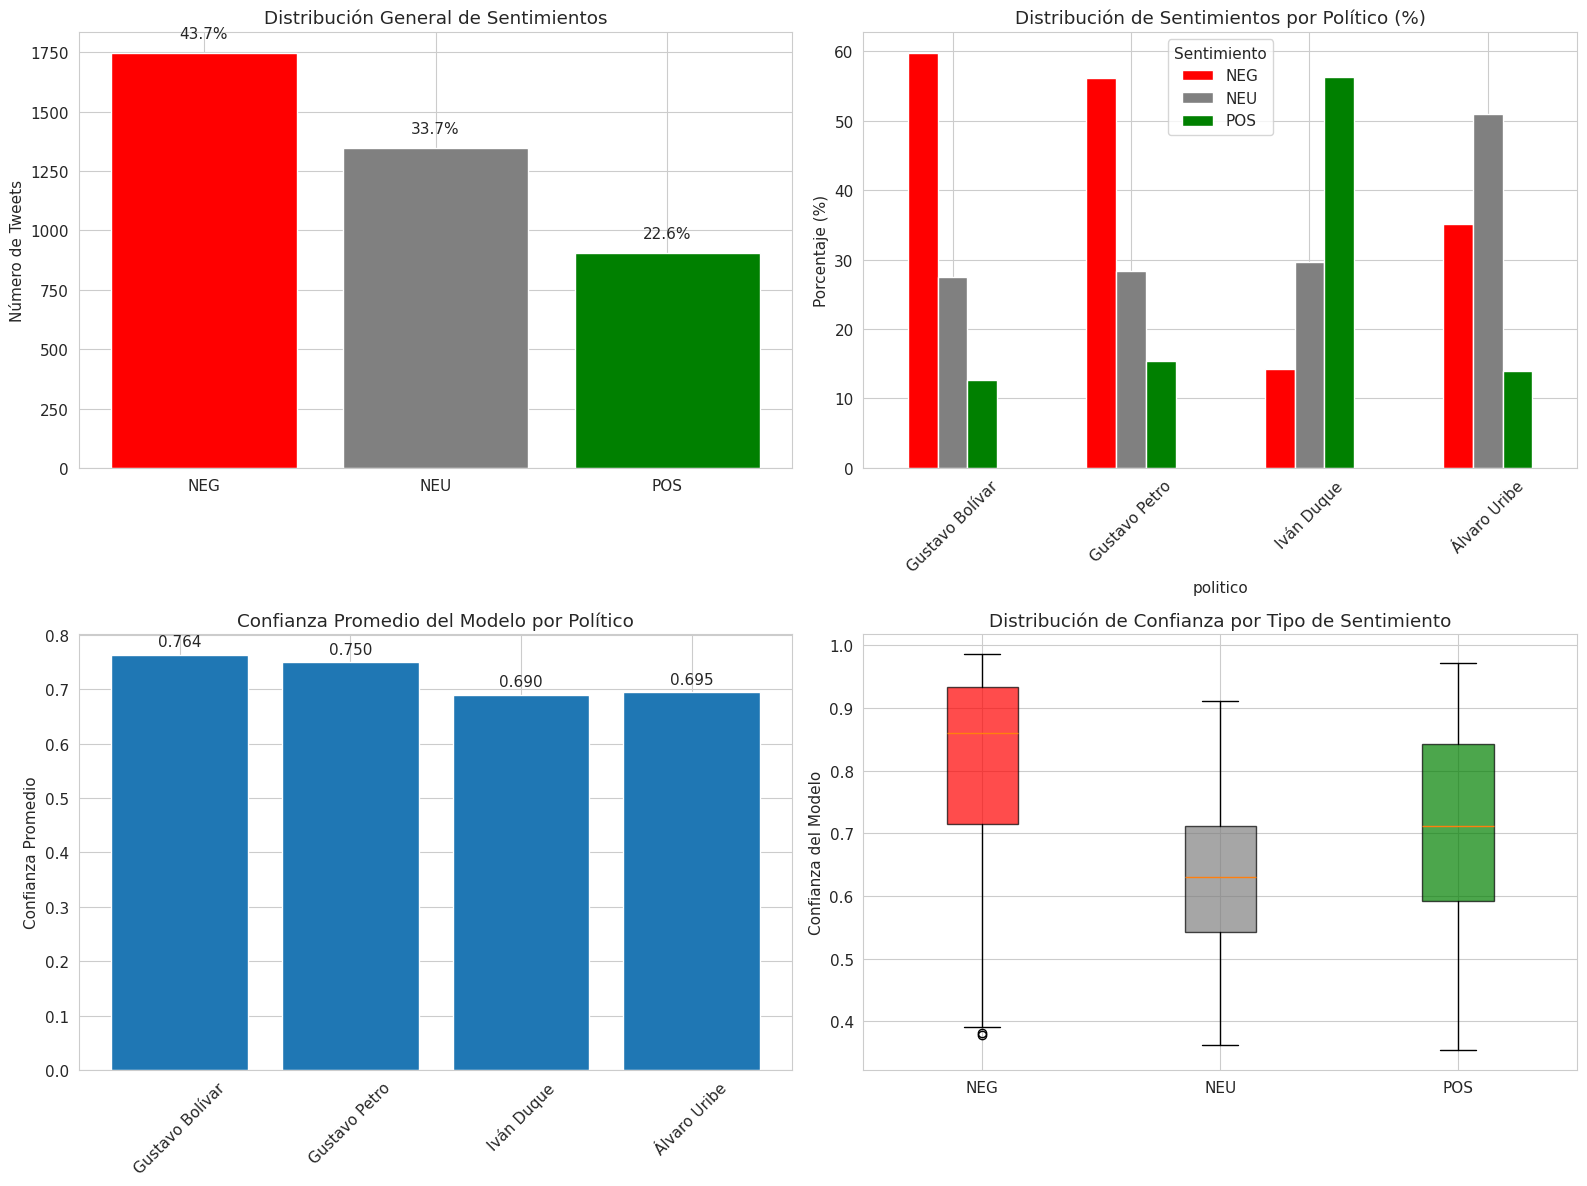

In [ ]:
# Ejecutar visualizaciones
create_sentiment_overview_plots(df)

## 5. An√°lisis temporal de sentimientos

In [ ]:
def analyze_temporal_sentiment(df):
    """
    Analiza evoluci√≥n temporal de sentimientos
    """
    # Calcular polaridad por trimestre y pol√≠tico
    temporal_analysis = []

    for politico in df['politico'].unique():
        politico_data = df[df['politico'] == politico]

        for period in politico_data['a√±o_trimestre'].unique():
            period_data = politico_data[politico_data['a√±o_trimestre'] == period]

            if len(period_data) > 0:
                pos_count = (period_data['sentiment_label'] == 'POS').sum()
                neg_count = (period_data['sentiment_label'] == 'NEG').sum()
                neu_count = (period_data['sentiment_label'] == 'NEU').sum()
                total = len(period_data)

                # Calcular polaridad: (positivos - negativos) / total
                polaridad = (pos_count - neg_count) / total if total > 0 else 0

                temporal_analysis.append({
                    'politico': politico,
                    'periodo': period,
                    'positivos': pos_count,
                    'negativos': neg_count,
                    'neutros': neu_count,
                    'total': total,
                    'polaridad': polaridad,
                    'pos_pct': (pos_count / total) * 100,
                    'neg_pct': (neg_count / total) * 100,
                    'neu_pct': (neu_count / total) * 100
                })

    return pd.DataFrame(temporal_analysis)

def visualize_temporal_sentiment(temporal_df):
    """
    Visualiza evoluci√≥n temporal de sentimientos
    """
    fig, axes = plt.subplots(2, 1, figsize=(16, 12))

    # 1. Evoluci√≥n de polaridad
    pivot_polaridad = temporal_df.pivot(index='periodo', columns='politico', values='polaridad')

    for politico in pivot_polaridad.columns:
        axes[0].plot(pivot_polaridad.index, pivot_polaridad[politico],
                    marker='o', linewidth=2, label=politico)

    axes[0].axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)
    axes[0].set_title('Evoluci√≥n de Polaridad Emocional por Trimestre', fontsize=16, fontweight='bold')
    axes[0].set_ylabel('Polaridad (Positivos-Negativos)/Total')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].legend(title='Pol√≠tico', bbox_to_anchor=(1.05, 1))
    axes[0].grid(True, alpha=0.3)

    # 2. Heatmap de sentimientos positivos
    pivot_positivos = temporal_df.pivot(index='politico', columns='periodo', values='pos_pct')

    sns.heatmap(pivot_positivos, annot=True, fmt='.1f', cmap='RdYlGn',
                ax=axes[1], cbar_kws={'label': '% Tweets Positivos'})
    axes[1].set_title('Porcentaje de Tweets Positivos por Pol√≠tico y Per√≠odo', fontsize=16, fontweight='bold')
    axes[1].set_xlabel('Per√≠odo')
    axes[1].set_ylabel('Pol√≠tico')

    plt.tight_layout()
    plt.show()

    return pivot_polaridad

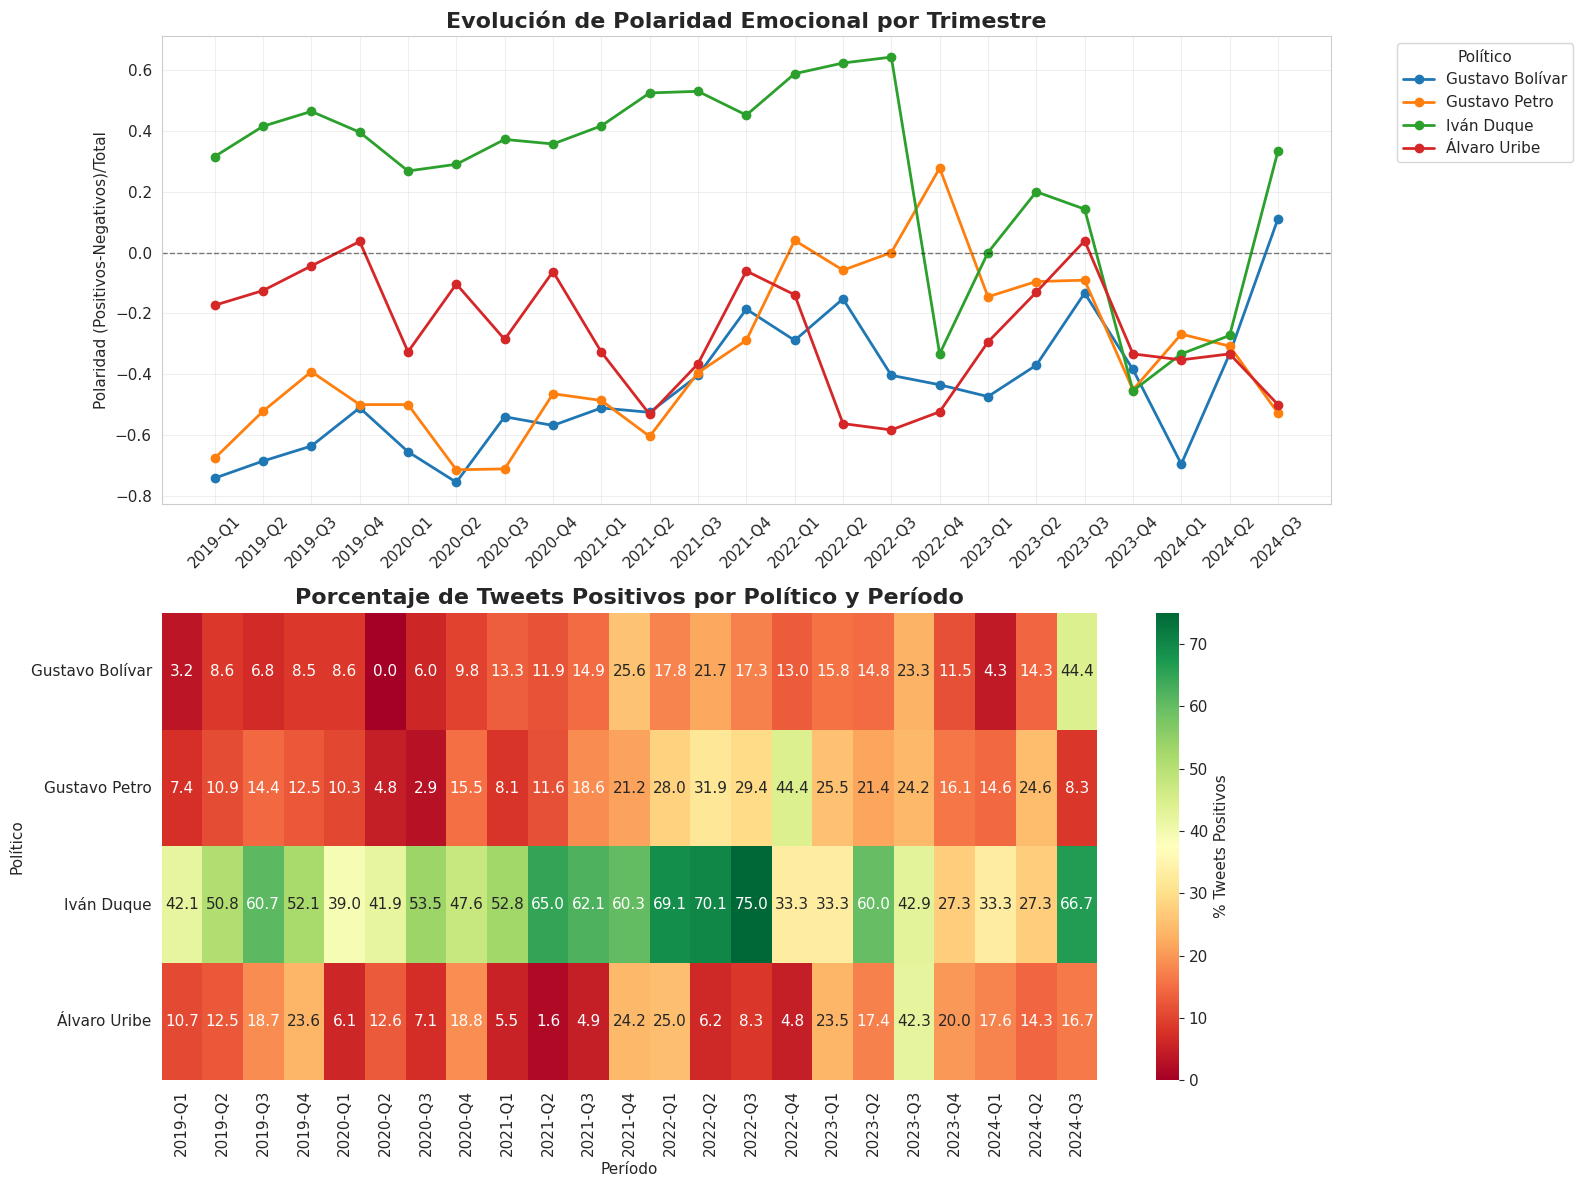


Estad√≠sticas de polaridad por pol√≠tico:

Gustavo Petro:
  Polaridad promedio: -0.343
  Desviaci√≥n est√°ndar: 0.263
  M√°ximo: +0.278
  M√≠nimo: -0.714

√Ålvaro Uribe:
  Polaridad promedio: -0.265
  Desviaci√≥n est√°ndar: 0.193
  M√°ximo: +0.038
  M√≠nimo: -0.583

Iv√°n Duque:
  Polaridad promedio: +0.258
  Desviaci√≥n est√°ndar: 0.323
  M√°ximo: +0.643
  M√≠nimo: -0.455

Gustavo Bol√≠var:
  Polaridad promedio: -0.447
  Desviaci√≥n est√°ndar: 0.217
  M√°ximo: +0.111
  M√≠nimo: -0.756


In [ ]:
# Realizar an√°lisis temporal
temporal_sentiment_df = analyze_temporal_sentiment(df)
polaridad_pivot = visualize_temporal_sentiment(temporal_sentiment_df)

# Mostrar estad√≠sticas temporales
print("\nEstad√≠sticas de polaridad por pol√≠tico:")
print("="*50)
for politico in df['politico'].unique():
    pol_data = temporal_sentiment_df[temporal_sentiment_df['politico'] == politico]
    if len(pol_data) > 0:
        avg_polaridad = pol_data['polaridad'].mean()
        std_polaridad = pol_data['polaridad'].std()
        max_polaridad = pol_data['polaridad'].max()
        min_polaridad = pol_data['polaridad'].min()

        print(f"\n{politico}:")
        print(f"  Polaridad promedio: {avg_polaridad:+.3f}")
        print(f"  Desviaci√≥n est√°ndar: {std_polaridad:.3f}")
        print(f"  M√°ximo: {max_polaridad:+.3f}")
        print(f"  M√≠nimo: {min_polaridad:+.3f}")

## 6. An√°lisis comparativo entre pol√≠ticos

In [ ]:
def create_politician_sentiment_profiles(df):
    """
    Crea perfiles detallados de sentimiento por pol√≠tico
    """
    profiles = {}

    for politico in df['politico'].unique():
        pol_data = df[df['politico'] == politico]

        # Calcular m√©tricas b√°sicas
        pos_pct = (pol_data['sentiment_label'] == 'POS').mean() * 100
        neg_pct = (pol_data['sentiment_label'] == 'NEG').mean() * 100
        neu_pct = (pol_data['sentiment_label'] == 'NEU').mean() * 100

        # Calcular m√©tricas avanzadas
        polaridad_neta = pos_pct - neg_pct
        confianza_promedio = pol_data['sentiment_confidence'].mean()
        variabilidad_temporal = temporal_sentiment_df[
            temporal_sentiment_df['politico'] == politico]['polaridad'].std()

        # Clasificar perfil emocional
        if polaridad_neta > 10:
            perfil = "Predominantemente Positivo"
        elif polaridad_neta < -10:
            perfil = "Predominantemente Negativo"
        else:
            perfil = "Equilibrado/Neutro"

        profiles[politico] = {
            'positivo_pct': pos_pct,
            'negativo_pct': neg_pct,
            'neutro_pct': neu_pct,
            'polaridad_neta': polaridad_neta,
            'confianza_promedio': confianza_promedio,
            'variabilidad_temporal': variabilidad_temporal,
            'perfil_emocional': perfil,
            'total_tweets': len(pol_data)
        }

    return profiles

def visualize_politician_profiles(profiles):
    """
    Visualiza perfiles comparativos de pol√≠ticos
    """
    # Crear DataFrame para visualizaci√≥n
    profile_df = pd.DataFrame(profiles).T

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Polaridad neta
    colors = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in profile_df['polaridad_neta']]
    bars = axes[0, 0].bar(profile_df.index, profile_df['polaridad_neta'], color=colors, alpha=0.7)
    axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
    axes[0, 0].set_title('Polaridad Neta por Pol√≠tico')
    axes[0, 0].set_ylabel('Polaridad Neta (%)')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # A√±adir valores
    for bar, val in zip(bars, profile_df['polaridad_neta']):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2,
                       bar.get_height() + (1 if val > 0 else -2),
                       f'{val:+.1f}%', ha='center', va='bottom' if val > 0 else 'top')

    # 2. Confianza del modelo
    bars = axes[0, 1].bar(profile_df.index, profile_df['confianza_promedio'])
    axes[0, 1].set_title('Confianza Promedio del Modelo')
    axes[0, 1].set_ylabel('Confianza')
    axes[0, 1].tick_params(axis='x', rotation=45)

    for bar, val in zip(bars, profile_df['confianza_promedio']):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{val:.3f}', ha='center', va='bottom')

    # 3. Variabilidad temporal
    bars = axes[1, 0].bar(profile_df.index, profile_df['variabilidad_temporal'])
    axes[1, 0].set_title('Variabilidad Temporal de Sentimientos')
    axes[1, 0].set_ylabel('Desviaci√≥n Est√°ndar de Polaridad')
    axes[1, 0].tick_params(axis='x', rotation=45)

    for bar, val in zip(bars, profile_df['variabilidad_temporal']):
        if not pd.isna(val):
            axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                           f'{val:.3f}', ha='center', va='bottom')

    # 4. Distribuci√≥n de sentimientos (stacked bar)
    bottom_neg = profile_df['negativo_pct']
    bottom_neu = bottom_neg + profile_df['neutro_pct']

    axes[1, 1].bar(profile_df.index, profile_df['negativo_pct'],
                  label='Negativo', color='red', alpha=0.7)
    axes[1, 1].bar(profile_df.index, profile_df['neutro_pct'],
                  bottom=profile_df['negativo_pct'], label='Neutro', color='gray', alpha=0.7)
    axes[1, 1].bar(profile_df.index, profile_df['positivo_pct'],
                  bottom=bottom_neu, label='Positivo', color='green', alpha=0.7)

    axes[1, 1].set_title('Distribuci√≥n de Sentimientos por Pol√≠tico')
    axes[1, 1].set_ylabel('Porcentaje (%)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

    return profile_df

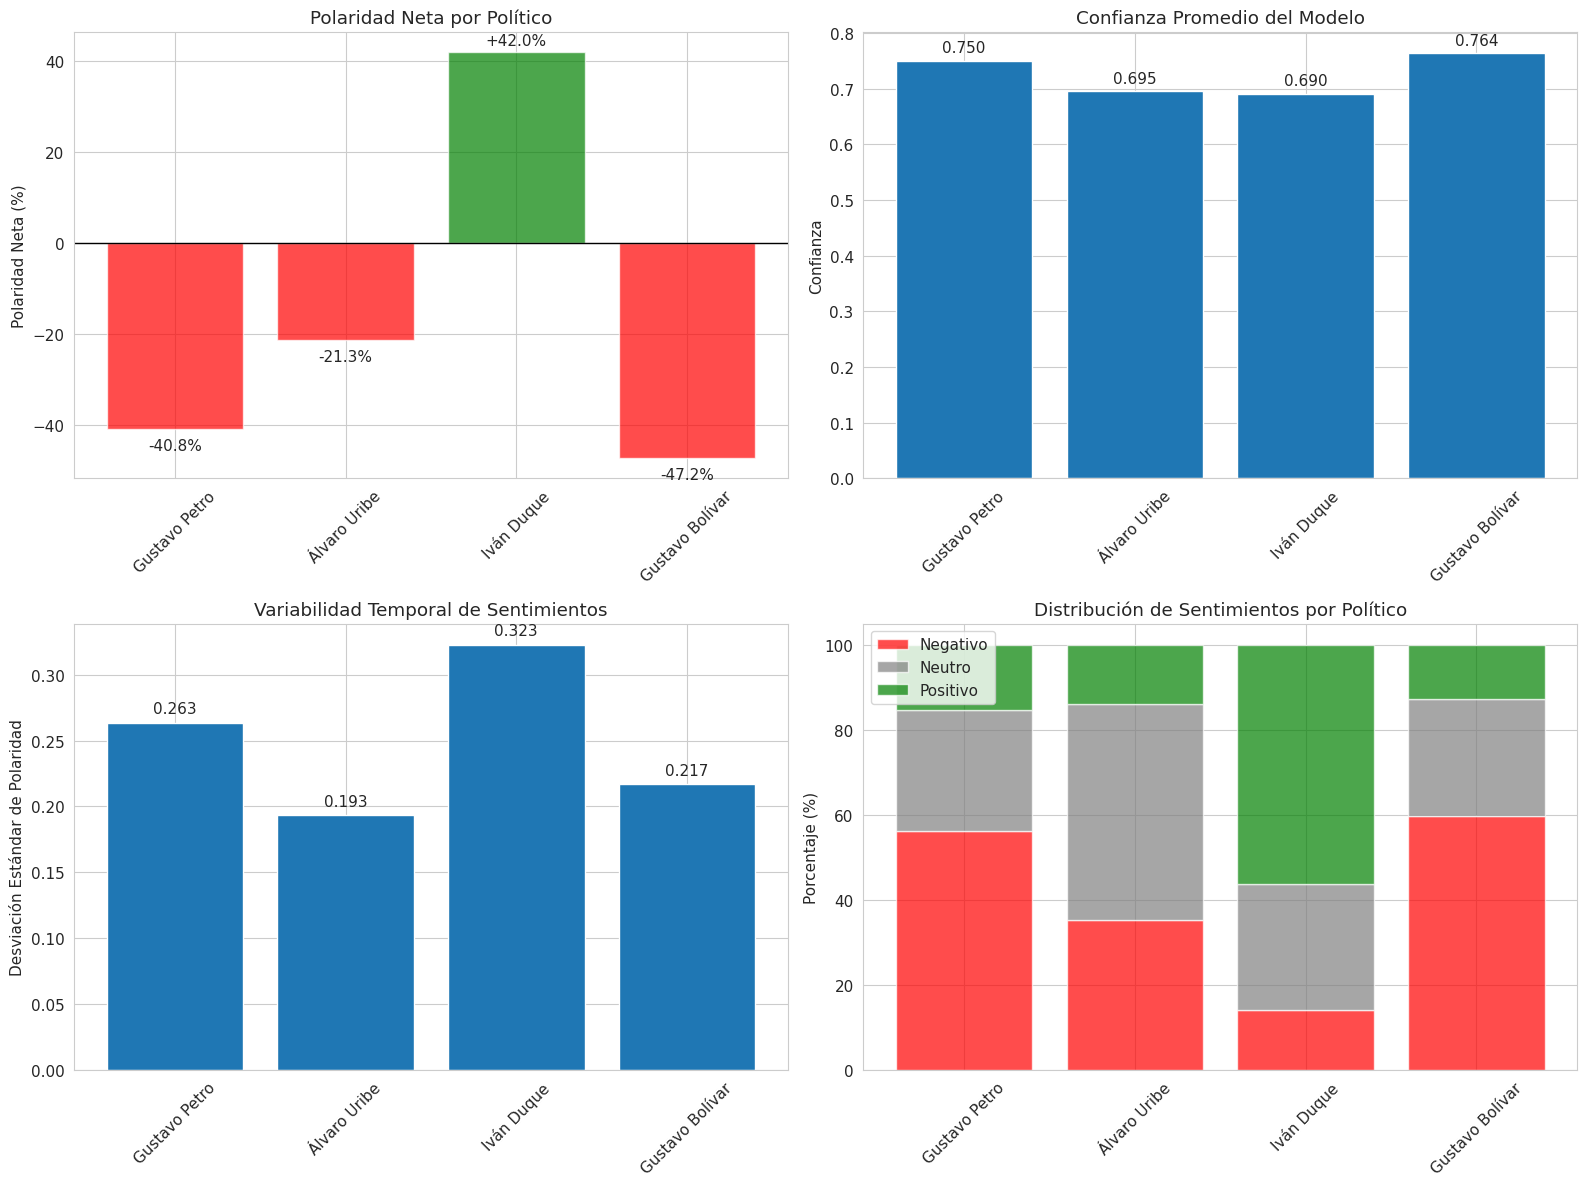


PERFILES EMOCIONALES DE POL√çTICOS

GUSTAVO PETRO:
  Perfil emocional: Predominantemente Negativo
  Polaridad neta: -40.8 puntos
  Tweets positivos: 15.4%
  Tweets negativos: 56.2%
  Tweets neutros: 28.4%
  Confianza del modelo: 0.750
  Variabilidad temporal: 0.263

√ÅLVARO URIBE:
  Perfil emocional: Predominantemente Negativo
  Polaridad neta: -21.3 puntos
  Tweets positivos: 13.9%
  Tweets negativos: 35.2%
  Tweets neutros: 50.9%
  Confianza del modelo: 0.695
  Variabilidad temporal: 0.193

IV√ÅN DUQUE:
  Perfil emocional: Predominantemente Positivo
  Polaridad neta: +42.0 puntos
  Tweets positivos: 56.2%
  Tweets negativos: 14.2%
  Tweets neutros: 29.6%
  Confianza del modelo: 0.690
  Variabilidad temporal: 0.323

GUSTAVO BOL√çVAR:
  Perfil emocional: Predominantemente Negativo
  Polaridad neta: -47.2 puntos
  Tweets positivos: 12.6%
  Tweets negativos: 59.8%
  Tweets neutros: 27.6%
  Confianza del modelo: 0.764
  Variabilidad temporal: 0.217


In [ ]:
# Crear y visualizar perfiles
politician_profiles = create_politician_sentiment_profiles(df)
profile_comparison = visualize_politician_profiles(politician_profiles)

# Mostrar resumen textual
print("\nPERFILES EMOCIONALES DE POL√çTICOS")
print("="*50)

for politico, profile in politician_profiles.items():
    print(f"\n{politico.upper()}:")
    print(f"  Perfil emocional: {profile['perfil_emocional']}")
    print(f"  Polaridad neta: {profile['polaridad_neta']:+.1f} puntos")
    print(f"  Tweets positivos: {profile['positivo_pct']:.1f}%")
    print(f"  Tweets negativos: {profile['negativo_pct']:.1f}%")
    print(f"  Tweets neutros: {profile['neutro_pct']:.1f}%")
    print(f"  Confianza del modelo: {profile['confianza_promedio']:.3f}")
    if not pd.isna(profile['variabilidad_temporal']):
        print(f"  Variabilidad temporal: {profile['variabilidad_temporal']:.3f}")

## 7. Comparaci√≥n con modelos transformer


In [ ]:
# Cargar modelo transformer alternativo para comparaci√≥n
print("Cargando modelo transformer de Hugging Face para comparaci√≥n...")

try:
    # Modelo RoBERTa multiling√ºe para sentimientos
    transformer_analyzer = pipeline(
        "sentiment-analysis",
        model="cardiffnlp/twitter-roberta-base-sentiment-latest",
        return_all_scores=True
    )
    model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
    print(f"Modelo cargado: {model_name}")
except:
    # Modelo alternativo
    transformer_analyzer = pipeline(
        "sentiment-analysis",
        model="nlptown/bert-base-multilingual-uncased-sentiment",
        return_all_scores=True
    )
    model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
    print(f"Modelo alternativo cargado: {model_name}")

def analyze_sentiment_transformer(text):
    """
    Analiza sentimiento usando transformer de Hugging Face
    """
    if not text or len(text.strip()) < 3:
        return 'NEUTRAL', 0.33

    try:
        # Truncar texto si es muy largo
        text = text[:512]
        result = transformer_analyzer(text)

        # Obtener la predicci√≥n con mayor confianza
        best_prediction = max(result[0], key=lambda x: x['score'])
        label = best_prediction['label']
        confidence = best_prediction['score']

        # Mapear etiquetas a formato est√°ndar
        if label in ['POSITIVE', 'POS', '5 stars', '4 stars', 'LABEL_2']:
            return 'POS', confidence
        elif label in ['NEGATIVE', 'NEG', '1 star', '2 stars', 'LABEL_0']:
            return 'NEG', confidence
        else:
            return 'NEU', confidence

    except Exception as e:
        print(f"Error en transformer: {e}")
        return 'NEU', 0.33

Cargando modelo transformer de Hugging Face para comparaci√≥n...


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Modelo cargado: cardiffnlp/twitter-roberta-base-sentiment-latest


In [ ]:
# Analizar una muestra para comparaci√≥n
sample_size = min(500, len(df))
sample_df = df.sample(n=sample_size, random_state=42).copy()

print(f"\nAnalizando muestra de {sample_size} tweets con transformer...")

transformer_results = []
for i, text in enumerate(sample_df['texto_sentiment']):
    result = analyze_sentiment_transformer(text)
    transformer_results.append(result)

    if (i + 1) % 100 == 0:
        print(f"  Procesados: {i+1}/{sample_size} tweets")

sample_df['sentiment_transformer'] = [result[0] for result in transformer_results]
sample_df['transformer_confidence'] = [result[1] for result in transformer_results]

print("An√°lisis con transformer completado")


Analizando muestra de 500 tweets con transformer...
  Procesados: 100/500 tweets
  Procesados: 200/500 tweets
  Procesados: 300/500 tweets
  Procesados: 400/500 tweets
  Procesados: 500/500 tweets
An√°lisis con transformer completado


### Ejercicio para estudiantes:
**Compara los resultados de ambos modelos:**

In [ ]:
# TU TURNO: Analiza las diferencias entre pysentimiento y transformer

def compare_sentiment_models(sample_df):
    """Compara pysentimiento vs transformer"""

    # 1. Calcular concordancia
    agreement = (sample_df['sentiment_label'] == sample_df['sentiment_transformer']).mean()
    print(f"Concordancia entre modelos: {agreement:.3f} ({agreement*100:.1f}%)")

    # 2. Matriz de confusi√≥n
    from sklearn.metrics import confusion_matrix, classification_report

    # Filtrar solo etiquetas comunes
    common_labels = ['POS', 'NEG', 'NEU']
    mask = (sample_df['sentiment_label'].isin(common_labels) &
            sample_df['sentiment_transformer'].isin(common_labels))
    filtered_df = sample_df[mask]

    if len(filtered_df) > 0:
        cm = confusion_matrix(filtered_df['sentiment_label'],
                            filtered_df['sentiment_transformer'],
                            labels=common_labels)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=common_labels, yticklabels=common_labels)
        plt.title('Matriz de Confusi√≥n: pysentimiento vs Transformer')
        plt.ylabel('pysentimiento')
        plt.xlabel('Transformer')
        plt.show()

        # Reporte de clasificaci√≥n
        print("\nReporte de clasificaci√≥n (transformer vs pysentimiento):")
        print(classification_report(filtered_df['sentiment_label'],
                                  filtered_df['sentiment_transformer']))

    # 3. Comparar confianzas
    print(f"\nConfianza promedio:")
    print(f"  pysentimiento: {sample_df['sentiment_confidence'].mean():.3f}")
    print(f"  Transformer: {sample_df['transformer_confidence'].mean():.3f}")

    # 4. Analizar discrepancias
    discrepancias = sample_df[sample_df['sentiment_label'] != sample_df['sentiment_transformer']]
    print(f"\nTweets con diferentes predicciones: {len(discrepancias)} ({len(discrepancias)/len(sample_df)*100:.1f}%)")

    if len(discrepancias) > 0:
        print(f"\nEjemplos de discrepancias:")
        for i, row in discrepancias.head(3).iterrows():
            print(f"\nTweet: {row['texto_sentiment'][:300]}...")
            print(f"pysentimiento: {row['sentiment_label']} (conf: {row['sentiment_confidence']:.3f})")
            print(f"Transformer: {row['sentiment_transformer']} (conf: {row['transformer_confidence']:.3f})")
            print("-" * 80)

Concordancia entre modelos: 0.358 (35.8%)


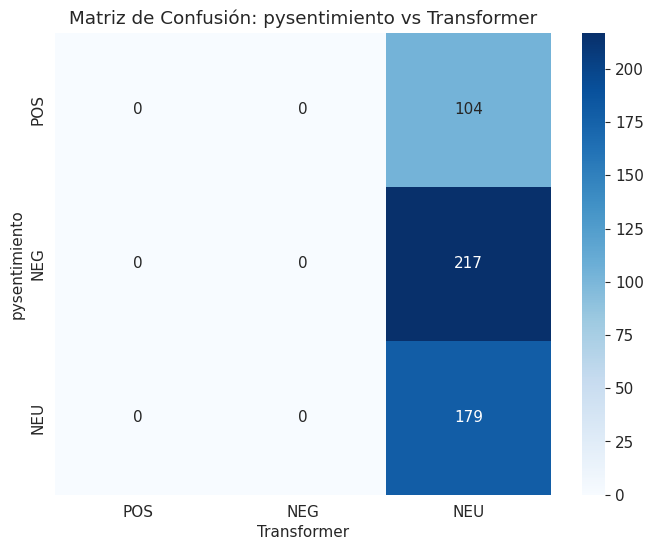


Reporte de clasificaci√≥n (transformer vs pysentimiento):
              precision    recall  f1-score   support

         NEG       0.00      0.00      0.00       217
         NEU       0.36      1.00      0.53       179
         POS       0.00      0.00      0.00       104

    accuracy                           0.36       500
   macro avg       0.12      0.33      0.18       500
weighted avg       0.13      0.36      0.19       500


Confianza promedio:
  pysentimiento: 0.720
  Transformer: 0.820

Tweets con diferentes predicciones: 321 (64.2%)

Ejemplos de discrepancias:

Tweet: La movilizaci√≥n de Bogot√°, adem√°s de apoyar la reforma a leyes que vulneraron los derechos de los colombianos: la ley 100 en salud y pensiones, la ley 50 en estabilidad laboral y la ley 30 de desfinanciamiento de la educaci√≥n superior, debe detener licitaciones de transmilenio...
pysentimiento: NEG (conf: 0.704)
Transformer: NEU (conf: 0.823)
-------------------------------------------------------------

In [ ]:
# Ejecutar comparaci√≥n
compare_sentiment_models(sample_df)

In [ ]:
print("\nCOMPLETA TU AN√ÅLISIS:")
print("1. ¬øQu√© modelo consideras m√°s confiable para tweets pol√≠ticos en espa√±ol?")
print("   Tu respuesta: ________________")
print("\n2. ¬øQu√© ventajas observas en cada modelo?")
print("   pysentimiento: ________________")
print("   Transformer: ________________")
print("\n3. ¬øPara qu√© tipo de an√°lisis usar√≠as cada modelo?")
print("   Tu respuesta: ________________")

## 8. An√°lisis de eventos y cambios temporales

In [ ]:
def identify_sentiment_events(temporal_df, threshold=0.15):
    """
    Identifica eventos significativos en cambios de sentimiento
    """
    print("DETECCI√ìN DE EVENTOS EN SENTIMIENTOS")
    print("="*50)

    events_detected = []

    for politico in temporal_df['politico'].unique():
        pol_data = temporal_df[temporal_df['politico'] == politico].sort_values('periodo')

        if len(pol_data) > 1:
            # Calcular cambios en polaridad
            pol_data = pol_data.copy()
            pol_data['cambio_polaridad'] = pol_data['polaridad'].diff()

            # Identificar cambios significativos
            cambios_significativos = pol_data[abs(pol_data['cambio_polaridad']) > threshold]

            print(f"\n{politico}:")
            print(f"  Polaridad promedio: {pol_data['polaridad'].mean():+.3f}")
            print(f"  Volatilidad (std): {pol_data['polaridad'].std():.3f}")

            if len(cambios_significativos) > 0:
                print(f"  Eventos detectados:")
                for _, row in cambios_significativos.iterrows():
                    direccion = "üìà Mejora" if row['cambio_polaridad'] > 0 else "üìâ Deterioro"
                    print(f"    {row['periodo']}: {direccion} ({row['cambio_polaridad']:+.3f})")

                    events_detected.append({
                        'politico': politico,
                        'periodo': row['periodo'],
                        'cambio': row['cambio_polaridad'],
                        'polaridad_nueva': row['polaridad'],
                        'tipo': 'mejora' if row['cambio_polaridad'] > 0 else 'deterioro'
                    })
            else:
                print(f"  Sin cambios significativos detectados")

    return pd.DataFrame(events_detected)

DETECCI√ìN DE EVENTOS EN SENTIMIENTOS

Gustavo Petro:
  Polaridad promedio: -0.343
  Volatilidad (std): 0.263
  Eventos detectados:
    2019-Q2: üìà Mejora (+0.155)
    2019-Q3: üìà Mejora (+0.130)
    2020-Q2: üìâ Deterioro (-0.214)
    2020-Q4: üìà Mejora (+0.247)
    2021-Q3: üìà Mejora (+0.209)
    2022-Q1: üìà Mejora (+0.328)
    2022-Q4: üìà Mejora (+0.278)
    2023-Q1: üìâ Deterioro (-0.423)
    2023-Q4: üìâ Deterioro (-0.361)
    2024-Q1: üìà Mejora (+0.183)
    2024-Q3: üìâ Deterioro (-0.220)

√Ålvaro Uribe:
  Polaridad promedio: -0.265
  Volatilidad (std): 0.193
  Eventos detectados:
    2020-Q1: üìâ Deterioro (-0.363)
    2020-Q2: üìà Mejora (+0.223)
    2020-Q3: üìâ Deterioro (-0.182)
    2020-Q4: üìà Mejora (+0.223)
    2021-Q1: üìâ Deterioro (-0.265)
    2021-Q2: üìâ Deterioro (-0.205)
    2021-Q3: üìà Mejora (+0.166)
    2021-Q4: üìà Mejora (+0.305)
    2022-Q2: üìâ Deterioro (-0.424)
    2023-Q1: üìà Mejora (+0.230)
    2023-Q2: üìà Mejora (+0.164)

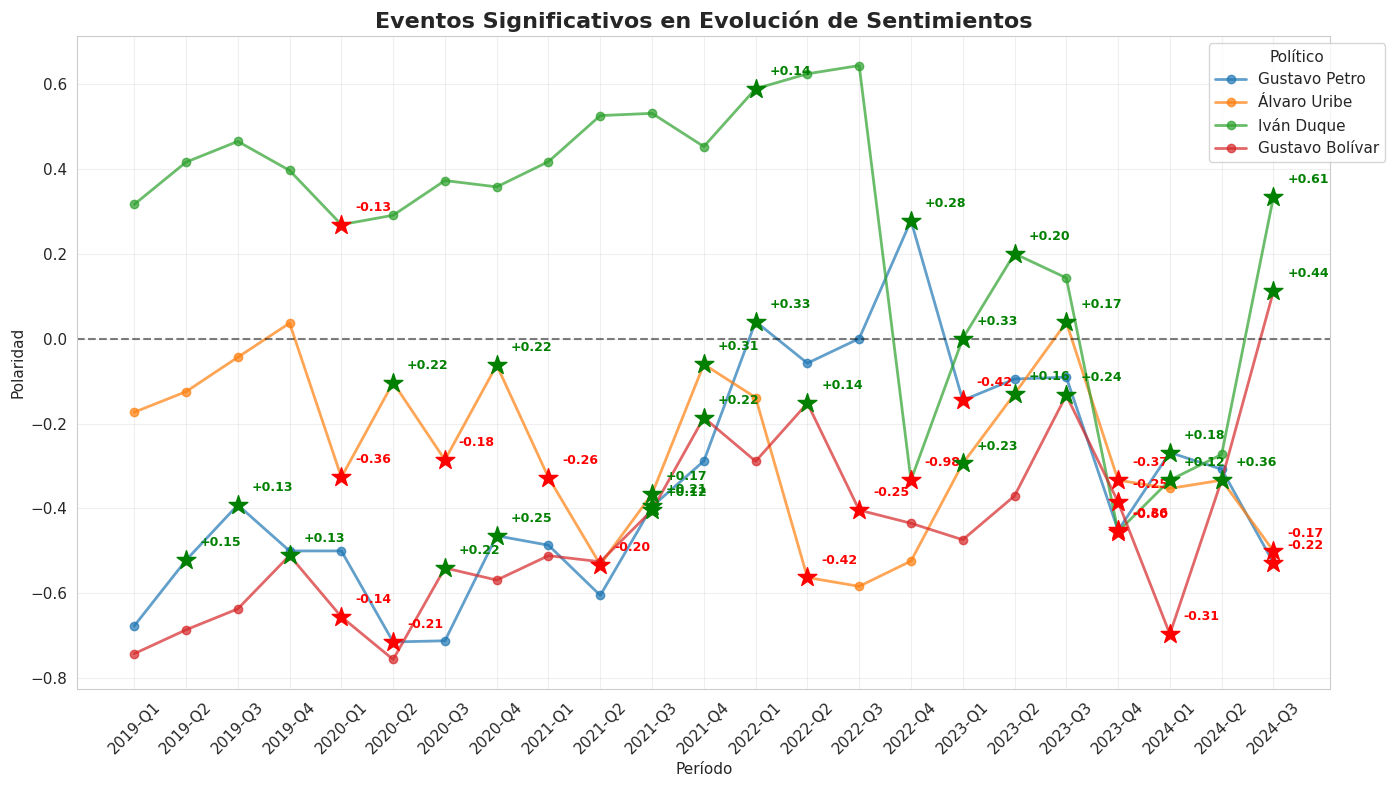

In [ ]:
# Detectar eventos
events_df = identify_sentiment_events(temporal_sentiment_df, threshold=0.12)

# Visualizar eventos detectados
if len(events_df) > 0:
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot l√≠neas de polaridad
    for politico in temporal_sentiment_df['politico'].unique():
        pol_data = temporal_sentiment_df[temporal_sentiment_df['politico'] == politico].sort_values('periodo')
        ax.plot(pol_data['periodo'], pol_data['polaridad'],
               marker='o', linewidth=2, label=politico, alpha=0.7)

    # Marcar eventos
    for _, event in events_df.iterrows():
        color = 'green' if event['tipo'] == 'mejora' else 'red'
        ax.scatter(event['periodo'], event['polaridad_nueva'],
                  color=color, s=200, marker='*', zorder=5)
        ax.annotate(f"{event['cambio']:+.2f}",
                   (event['periodo'], event['polaridad_nueva']),
                   xytext=(10, 10), textcoords='offset points',
                   fontsize=9, color=color, fontweight='bold')

    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax.set_title('Eventos Significativos en Evoluci√≥n de Sentimientos', fontsize=16, fontweight='bold')
    ax.set_ylabel('Polaridad')
    ax.set_xlabel('Per√≠odo')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Pol√≠tico', bbox_to_anchor=(1.05, 1))
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("No se detectaron eventos significativos con el umbral actual")

### Ejercicio:
**Conecta cambios en sentimientos con eventos pol√≠ticos:**

In [ ]:
# TU TURNO: Analiza eventos pol√≠ticos que expliquen los cambios

print("AN√ÅLISIS DE EVENTOS POL√çTICOS")
print("="*40)

# Diccionario para que los estudiantes completen
eventos_politicos_importantes = {
    # Ejemplo de formato:
    # "2020-Q2": "Inicio de pandemia COVID-19",
    # "2022-Q2": "Elecciones presidenciales primera vuelta",
    # "2022-Q3": "Elecciones presidenciales segunda vuelta",
    # Completa con eventos que identifiques:
}

print("1. Revisa los per√≠odos con cambios significativos detectados")
print("2. Investiga qu√© eventos pol√≠ticos ocurrieron en esos trimestres")
print("3. Completa el diccionario eventos_politicos_importantes")

print(f"\nEventos identificados autom√°ticamente:")
if len(events_df) > 0:
    for _, event in events_df.iterrows():
        print(f"  {event['politico']} en {event['periodo']}: {event['tipo']} ({event['cambio']:+.3f})")

print(f"\n4. Reflexiones:")
print("¬øQu√© eventos pol√≠ticos podr√≠an explicar los cambios observados?")
print("Tu respuesta: ________________")

print("\n¬øObservas patrones comunes entre pol√≠ticos en ciertos per√≠odos?")
print("Tu respuesta: ________________")

print("\n¬øQu√© pol√≠tico muestra mayor volatilidad emocional?")
print("Tu respuesta: ________________")

AN√ÅLISIS DE EVENTOS POL√çTICOS
1. Revisa los per√≠odos con cambios significativos detectados
2. Investiga qu√© eventos pol√≠ticos ocurrieron en esos trimestres
3. Completa el diccionario eventos_politicos_importantes

Eventos identificados autom√°ticamente:
  Gustavo Petro en 2019-Q2: mejora (+0.155)
  Gustavo Petro en 2019-Q3: mejora (+0.130)
  Gustavo Petro en 2020-Q2: deterioro (-0.214)
  Gustavo Petro en 2020-Q4: mejora (+0.247)
  Gustavo Petro en 2021-Q3: mejora (+0.209)
  Gustavo Petro en 2022-Q1: mejora (+0.328)
  Gustavo Petro en 2022-Q4: mejora (+0.278)
  Gustavo Petro en 2023-Q1: deterioro (-0.423)
  Gustavo Petro en 2023-Q4: deterioro (-0.361)
  Gustavo Petro en 2024-Q1: mejora (+0.183)
  Gustavo Petro en 2024-Q3: deterioro (-0.220)
  √Ålvaro Uribe en 2020-Q1: deterioro (-0.363)
  √Ålvaro Uribe en 2020-Q2: mejora (+0.223)
  √Ålvaro Uribe en 2020-Q3: deterioro (-0.182)
  √Ålvaro Uribe en 2020-Q4: mejora (+0.223)
  √Ålvaro Uribe en 2021-Q1: deterioro (-0.265)
  √Ålvaro Uribe 


## 9. An√°lisis avanzado: palabras asociadas a sentimientos

In [ ]:
def analyze_sentiment_vocabulary(df):
    """
    Analiza vocabulario asociado a diferentes sentimientos
    """
    print("VOCABULARIO ASOCIADO A SENTIMIENTOS")
    print("="*45)

    # Cargar modelo spaCy para an√°lisis de vocabulario
    try:
        import spacy
        nlp = spacy.load('es_core_news_sm')
    except:
        print("Instalando y cargando spaCy...")
        import subprocess
        subprocess.run(["python", "-m", "spacy", "download", "es_core_news_sm"], check=True)
        import spacy
        nlp = spacy.load('es_core_news_sm')

    sentiment_vocab = {}

    for sentiment in ['POS', 'NEG', 'NEU']:
        sentiment_tweets = df[df['sentiment_label'] == sentiment]['texto_sentiment']

        # Extraer palabras relevantes
        all_words = []
        for text in sentiment_tweets.head(1000):  # Muestra para eficiencia
            if len(text) > 10:
                doc = nlp(text)
                words = [token.lemma_.lower() for token in doc
                        if not token.is_stop and not token.is_punct
                        and token.is_alpha and len(token.text) > 3]
                all_words.extend(words)

        # Contar frecuencias
        word_freq = Counter(all_words).most_common(20)
        sentiment_vocab[sentiment] = word_freq

        print(f"\n{sentiment} - Palabras m√°s frecuentes:")
        for word, freq in word_freq[:10]:
            print(f"  {word}: {freq}")

    return sentiment_vocab

def visualize_sentiment_vocabulary(sentiment_vocab):
    """
    Visualiza vocabulario por sentimiento
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sentiments = ['NEG', 'NEU', 'POS']
    colors = ['red', 'gray', 'green']

    for i, (sentiment, color) in enumerate(zip(sentiments, colors)):
        if sentiment in sentiment_vocab:
            words = [item[0] for item in sentiment_vocab[sentiment][:12]]
            frequencies = [item[1] for item in sentiment_vocab[sentiment][:12]]

            bars = axes[i].barh(range(len(words)), frequencies, color=color, alpha=0.7)
            axes[i].set_yticks(range(len(words)))
            axes[i].set_yticklabels(words)
            axes[i].set_xlabel('Frecuencia')
            axes[i].set_title(f'Vocabulario {sentiment}')
            axes[i].invert_yaxis()

            # A√±adir valores
            for j, (bar, freq) in enumerate(zip(bars, frequencies)):
                axes[i].text(freq + 1, j, str(freq), va='center')

    plt.tight_layout()
    plt.show()

VOCABULARIO ASOCIADO A SENTIMIENTOS
Instalando y cargando spaCy...

POS - Palabras m√°s frecuentes:
  colombia: 209
  pa√≠s: 192
  colombiano: 82
  gobierno: 81
  gracias: 74
  mill√≥n: 65
  bogot√°: 62
  social: 62
  a√±o: 59
  seguir: 57

NEG - Palabras m√°s frecuentes:
  colombia: 178
  duque: 120
  gobierno: 101
  pa√≠s: 85
  bogot√°: 83
  social: 69
  salud: 63
  colombiano: 62
  p√∫blico: 60
  pasar: 53

NEU - Palabras m√°s frecuentes:
  colombia: 145
  gobierno: 84
  bogot√°: 69
  pa√≠s: 64
  mill√≥n: 54
  social: 50
  p√∫blico: 46
  colombiano: 44
  nacional: 41
  salud: 37


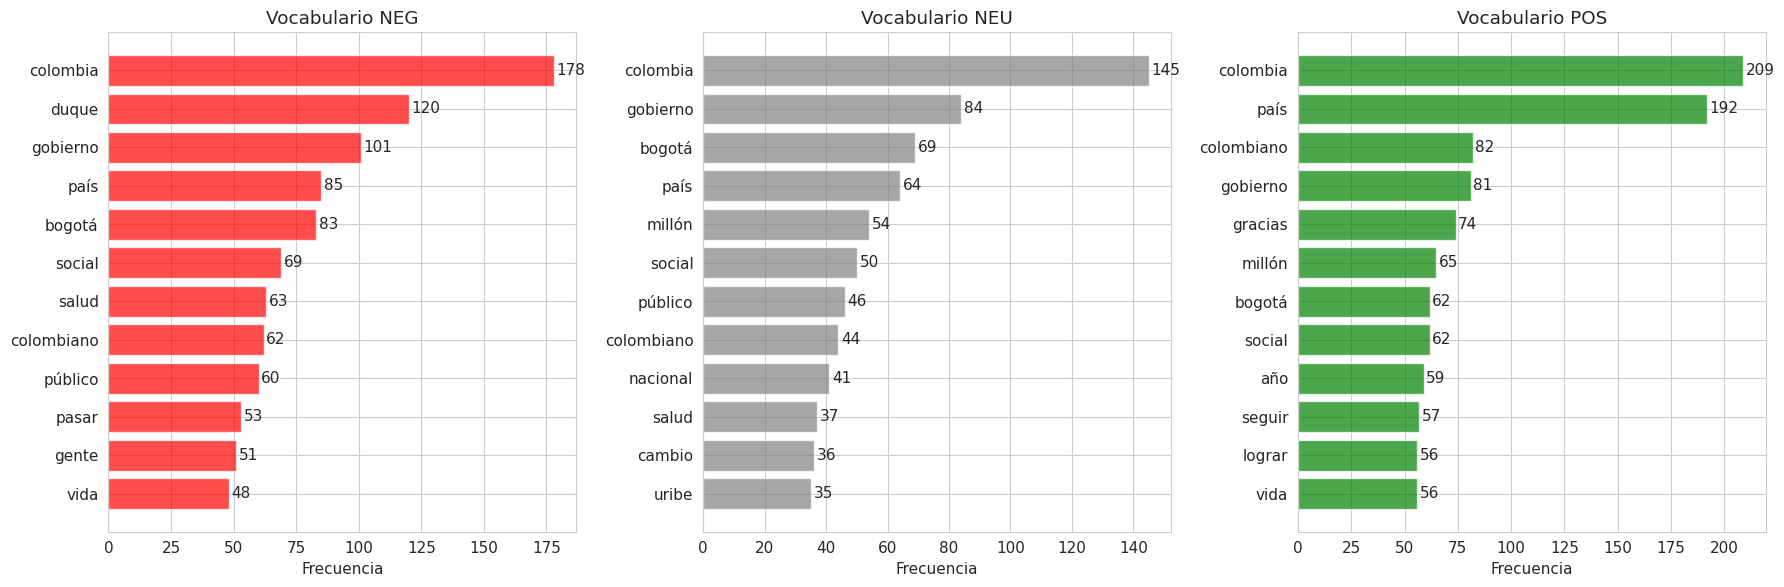

In [ ]:
vocab_by_sentiment = analyze_sentiment_vocabulary(df)
visualize_sentiment_vocabulary(vocab_by_sentiment)

## 10. Dashboard interactivo con Plotly

In [ ]:
def create_interactive_sentiment_dashboard(df, temporal_df):
    """
    Crea dashboard interactivo para explorar sentimientos
    """
    # 1. Gr√°fico temporal interactivo
    fig_temporal = go.Figure()

    for politico in temporal_df['politico'].unique():
        pol_data = temporal_df[temporal_df['politico'] == politico].sort_values('periodo')

        fig_temporal.add_trace(go.Scatter(
            x=pol_data['periodo'],
            y=pol_data['polaridad'],
            mode='lines+markers',
            name=politico,
            line=dict(width=3),
            marker=dict(size=8),
            hovertemplate='<b>%{fullData.name}</b><br>' +
                         'Per√≠odo: %{x}<br>' +
                         'Polaridad: %{y:.3f}<br>' +
                         '<extra></extra>'
        ))

    fig_temporal.add_hline(y=0, line_dash="dash", line_color="black", opacity=0.5)
    fig_temporal.update_layout(
        title='Evoluci√≥n Temporal de Polaridad Emocional (Interactivo)',
        xaxis_title='Per√≠odo',
        yaxis_title='Polaridad (Positivos-Negativos)/Total',
        hovermode='x unified',
        height=500
    )

    fig_temporal.show()

    # 2. Distribuci√≥n por pol√≠tico (interactivo)
    fig_dist = go.Figure()

    sentiments = ['NEG', 'NEU', 'POS']
    colors = ['red', 'gray', 'green']

    for sentiment, color in zip(sentiments, colors):
        values = []
        for politico in df['politico'].unique():
            pol_data = df[df['politico'] == politico]
            pct = (pol_data['sentiment_label'] == sentiment).mean() * 100
            values.append(pct)

        fig_dist.add_trace(go.Bar(
            x=df['politico'].unique(),
            y=values,
            name=sentiment,
            marker_color=color,
            opacity=0.8,
            hovertemplate='<b>%{fullData.name}</b><br>' +
                         'Pol√≠tico: %{x}<br>' +
                         'Porcentaje: %{y:.1f}%<br>' +
                         '<extra></extra>'
        ))

    fig_dist.update_layout(
        title='Distribuci√≥n de Sentimientos por Pol√≠tico (Interactivo)',
        xaxis_title='Pol√≠tico',
        yaxis_title='Porcentaje (%)',
        barmode='stack',
        height=500
    )

    fig_dist.show()

    # 3. Scatter plot: Polaridad vs Confianza
    fig_scatter = go.Figure()

    for politico in df['politico'].unique():
        pol_data = df[df['politico'] == politico]

        # Calcular polaridad promedio y confianza promedio
        pos_pct = (pol_data['sentiment_label'] == 'POS').mean() * 100
        neg_pct = (pol_data['sentiment_label'] == 'NEG').mean() * 100
        polaridad = pos_pct - neg_pct
        confianza = pol_data['sentiment_confidence'].mean()

        fig_scatter.add_trace(go.Scatter(
            x=[confianza],
            y=[polaridad],
            mode='markers+text',
            name=politico,
            marker=dict(size=15, opacity=0.8),
            text=[politico],
            textposition="top center",
            hovertemplate='<b>%{text}</b><br>' +
                         'Confianza: %{x:.3f}<br>' +
                         'Polaridad: %{y:.1f}<br>' +
                         '<extra></extra>'
        ))

    fig_scatter.add_hline(y=0, line_dash="dash", line_color="black", opacity=0.5)
    fig_scatter.update_layout(
        title='Polaridad vs Confianza del Modelo por Pol√≠tico',
        xaxis_title='Confianza Promedio del Modelo',
        yaxis_title='Polaridad Neta (%)',
        showlegend=False,
        height=500
    )

    fig_scatter.show()

In [ ]:
# Crear dashboard interactivo
print("Creando dashboard interactivo...")
create_interactive_sentiment_dashboard(df, temporal_sentiment_df)

Creando dashboard interactivo...


## 11. An√°lisis estad√≠stico avanzado

In [ ]:
def advanced_statistical_analysis(df, temporal_df):
    """
    An√°lisis estad√≠stico avanzado de sentimientos
    """
    from scipy import stats

    print("AN√ÅLISIS ESTAD√çSTICO AVANZADO")
    print("="*40)

    # 1. Test de normalidad para polaridades
    print("\n1. TESTS DE NORMALIDAD:")
    for politico in temporal_df['politico'].unique():
        pol_data = temporal_df[temporal_df['politico'] == politico]['polaridad']
        if len(pol_data) > 3:
            statistic, p_value = stats.shapiro(pol_data)
            print(f"  {politico}:")
            print(f"    Shapiro-Wilk: p-value = {p_value:.4f}")
            print(f"    Distribuci√≥n: {'Normal' if p_value > 0.05 else 'No normal'}")

    # 2. Comparaci√≥n entre pol√≠ticos (ANOVA)
    print(f"\n2. COMPARACI√ìN ENTRE POL√çTICOS:")

    # Preparar datos para ANOVA
    groups = []
    for politico in df['politico'].unique():
        pol_data = df[df['politico'] == politico]
        # Convertir sentimientos a valores num√©ricos
        sentiment_values = pol_data['sentiment_label'].map({'NEG': -1, 'NEU': 0, 'POS': 1})
        groups.append(sentiment_values.dropna())

    if len(groups) > 1:
        f_statistic, p_value = stats.f_oneway(*groups)
        print(f"  ANOVA F-statistic: {f_statistic:.4f}")
        print(f"  p-value: {p_value:.4f}")
        print(f"  Resultado: {'Diferencias significativas' if p_value < 0.05 else 'Sin diferencias significativas'}")

    # 3. Correlaciones temporales
    print(f"\n3. AN√ÅLISIS DE CORRELACIONES TEMPORALES:")

    # Crear matriz de correlaciones entre pol√≠ticos
    pivot_polaridad = temporal_df.pivot(index='periodo', columns='politico', values='polaridad')
    correlations = pivot_polaridad.corr()

    print("  Correlaciones de polaridad entre pol√≠ticos:")
    for i, pol1 in enumerate(correlations.columns):
        for j, pol2 in enumerate(correlations.columns):
            if i < j:  # Solo mostrar tri√°ngulo superior
                corr_val = correlations.loc[pol1, pol2]
                if not pd.isna(corr_val):
                    print(f"    {pol1} - {pol2}: {corr_val:.3f}")

    # Visualizar matriz de correlaciones
    plt.figure(figsize=(8, 6))
    mask = np.triu(np.ones_like(correlations, dtype=bool))
    sns.heatmap(correlations, mask=mask, annot=True, fmt='.3f',
                cmap='RdBu_r', center=0, vmin=-1, vmax=1)
    plt.title('Correlaciones de Polaridad entre Pol√≠ticos')
    plt.tight_layout()
    plt.show()

    # 4. Tendencias temporales
    print(f"\n4. TENDENCIAS TEMPORALES:")

    for politico in temporal_df['politico'].unique():
        pol_data = temporal_df[temporal_df['politico'] == politico].sort_values('periodo')
        if len(pol_data) > 3:
            # Crear variable num√©rica para el tiempo
            pol_data['periodo_num'] = range(len(pol_data))

            # Regresi√≥n lineal simple
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                pol_data['periodo_num'], pol_data['polaridad'])

            print(f"  {politico}:")
            print(f"    Tendencia: {slope:+.4f} por trimestre")
            print(f"    R¬≤: {r_value**2:.3f}")
            print(f"    Significancia: {'S√≠' if p_value < 0.05 else 'No'} (p={p_value:.4f})")

AN√ÅLISIS ESTAD√çSTICO AVANZADO

1. TESTS DE NORMALIDAD:
  Gustavo Petro:
    Shapiro-Wilk: p-value = 0.2868
    Distribuci√≥n: Normal
  √Ålvaro Uribe:
    Shapiro-Wilk: p-value = 0.1745
    Distribuci√≥n: Normal
  Iv√°n Duque:
    Shapiro-Wilk: p-value = 0.0044
    Distribuci√≥n: No normal
  Gustavo Bol√≠var:
    Shapiro-Wilk: p-value = 0.3550
    Distribuci√≥n: Normal

2. COMPARACI√ìN ENTRE POL√çTICOS:
  ANOVA F-statistic: 284.1860
  p-value: 0.0000
  Resultado: Diferencias significativas

3. AN√ÅLISIS DE CORRELACIONES TEMPORALES:
  Correlaciones de polaridad entre pol√≠ticos:
    Gustavo Bol√≠var - Gustavo Petro: 0.425
    Gustavo Bol√≠var - Iv√°n Duque: 0.074
    Gustavo Bol√≠var - √Ålvaro Uribe: -0.224
    Gustavo Petro - Iv√°n Duque: -0.183
    Gustavo Petro - √Ålvaro Uribe: -0.220
    Iv√°n Duque - √Ålvaro Uribe: 0.084


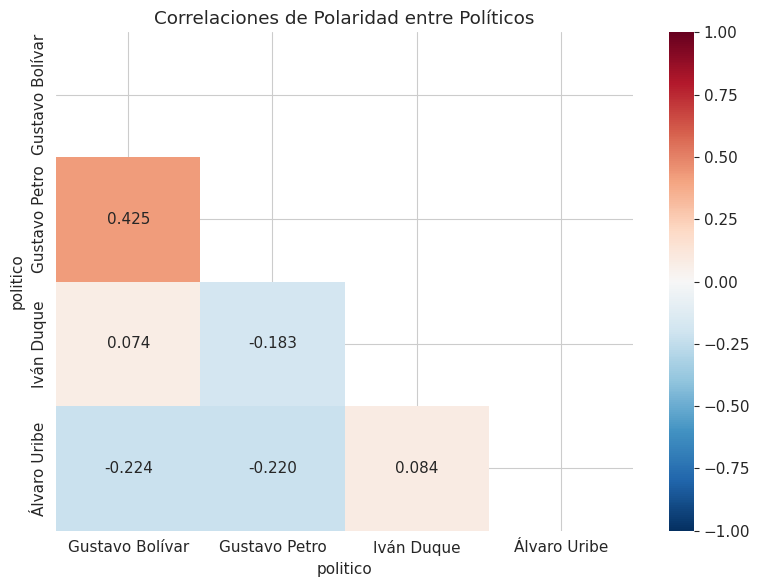


4. TENDENCIAS TEMPORALES:
  Gustavo Petro:
    Tendencia: +0.0204 por trimestre
    R¬≤: 0.276
    Significancia: S√≠ (p=0.0101)
  √Ålvaro Uribe:
    Tendencia: -0.0114 por trimestre
    R¬≤: 0.159
    Significancia: No (p=0.0593)
  Iv√°n Duque:
    Tendencia: -0.0255 por trimestre
    R¬≤: 0.287
    Significancia: S√≠ (p=0.0085)
  Gustavo Bol√≠var:
    Tendencia: +0.0211 por trimestre
    R¬≤: 0.437
    Significancia: S√≠ (p=0.0006)


In [ ]:
# Ejecutar an√°lisis estad√≠stico
advanced_statistical_analysis(df, temporal_sentiment_df)

## 12. Exportamos resultados y s√≠ntesis

In [ ]:
def export_sentiment_results(df, temporal_df, politician_profiles):
    """
    Exporta resultados del an√°lisis para uso posterior
    """
    print("EXPORTANDO RESULTADOS DEL AN√ÅLISIS")
    print("="*40)

    # 1. Dataset con sentimientos
    df_export = df[['politico', 'texto', 'fecha', 'a√±o_trimestre',
                   'sentiment_label', 'sentiment_confidence']].copy()
    df_export.to_csv('tweets_con_sentimientos_detallado.csv', index=False)
    print("‚úì Dataset con sentimientos: tweets_con_sentimientos_detallado.csv")

    # 2. Resumen temporal
    temporal_df.to_csv('evolucion_temporal_sentimientos.csv', index=False)
    print("‚úì Evoluci√≥n temporal: evolucion_temporal_sentimientos.csv")

    # 3. Perfiles de pol√≠ticos
    profile_df = pd.DataFrame(politician_profiles).T
    profile_df.to_csv('perfiles_sentimiento_politicos.csv')
    print("‚úì Perfiles pol√≠ticos: perfiles_sentimiento_politicos.csv")

    # 4. Resumen ejecutivo
    with open('resumen_analisis_sentimientos.txt', 'w', encoding='utf-8') as f:
        f.write("RESUMEN EJECUTIVO - AN√ÅLISIS DE SENTIMIENTOS\n")
        f.write("="*50 + "\n\n")

        f.write(f"DATOS PROCESADOS:\n")
        f.write(f"- Total tweets analizados: {len(df):,}\n")
        f.write(f"- Per√≠odo: {df['fecha'].min()} - {df['fecha'].max()}\n")
        f.write(f"- Pol√≠ticos: {', '.join(df['politico'].unique())}\n\n")

        f.write("RESULTADOS PRINCIPALES:\n")
        for politico, profile in politician_profiles.items():
            f.write(f"\n{politico}:\n")
            f.write(f"  - Perfil emocional: {profile['perfil_emocional']}\n")
            f.write(f"  - Polaridad neta: {profile['polaridad_neta']:+.1f} puntos\n")
            f.write(f"  - Confianza del modelo: {profile['confianza_promedio']:.3f}\n")

    print("‚úì Resumen ejecutivo: resumen_analisis_sentimientos.txt")

    # 5. Descargar archivos en Colab
    from google.colab import files

    files.download('tweets_con_sentimientos_detallado.csv')
    files.download('evolucion_temporal_sentimientos.csv')
    files.download('perfiles_sentimiento_politicos.csv')
    files.download('resumen_analisis_sentimientos.txt')

    print("\nüìÅ Todos los archivos han sido descargados")

In [ ]:
# Exportar resultados
export_sentiment_results(df, temporal_sentiment_df, politician_profiles)